Examples and code taken from:

Hilpisch, Yves. <i>Python for Finance</i>. O'Reilly Media, Inc. December 2014.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
goog = pdr.get_data_yahoo('GOOG', start='2009-03-14', end='2014-04-14')

[*********************100%%**********************]  1 of 1 completed


In [3]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-07,26.962973,27.348913,26.285334,26.833828,26.833828,88033033
2014-04-08,27.055719,27.674021,27.006353,27.669035,27.669035,63024560
2014-04-09,27.904388,28.191101,27.571802,28.129770,28.129770,66616395
2014-04-10,28.172651,28.172651,26.921087,26.973444,26.973444,80737057
2014-04-11,26.554594,26.926073,26.254417,26.457361,26.457361,78496923


In [4]:
goog['LogRet'] = np.log(goog['Close'] / goog['Close'].shift(1))

In [5]:
goog['Volatility'] = goog['LogRet'].rolling(252).std()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

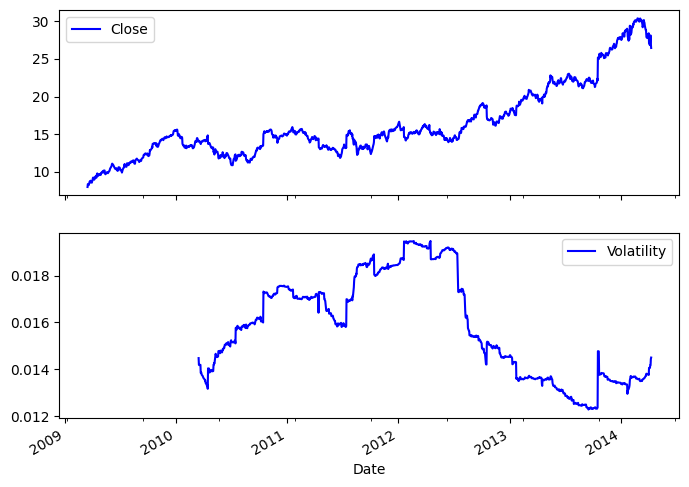

In [6]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8,6))

In [7]:
sp500 = pdr.get_data_yahoo('^GSPC', start='2000-01-01', end='2014-04-15')

[*********************100%%**********************]  1 of 1 completed


In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3592 non-null   float64
 1   High       3592 non-null   float64
 2   Low        3592 non-null   float64
 3   Close      3592 non-null   float64
 4   Adj Close  3592 non-null   float64
 5   Volume     3592 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


<Axes: xlabel='Date'>

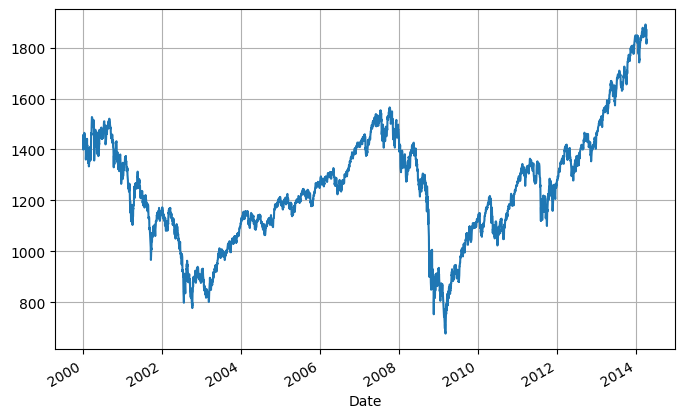

In [9]:
sp500['Close'].plot(grid=True, figsize=(8, 5))

In [10]:
sp500['42d'] = np.round(sp500['Close'].rolling(42).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(252).mean(), 2)

In [11]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2014-04-08,1851.959961,1853.88,1728.66
2014-04-09,1872.180054,1855.67,1729.79
2014-04-10,1833.079956,1856.46,1730.74
2014-04-11,1815.689941,1856.36,1731.64
2014-04-14,1830.609985,1856.63,1732.74


<Axes: xlabel='Date'>

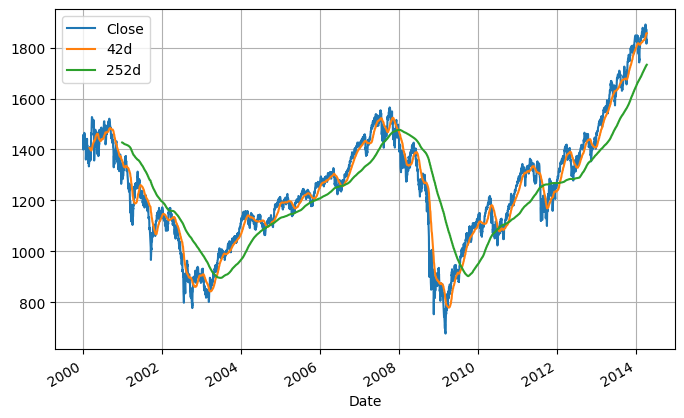

In [12]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [13]:
DAX = pdr.get_data_yahoo('^GDAXI', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [14]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6071 entries, 2000-01-03 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6071 non-null   float64
 1   High       6071 non-null   float64
 2   Low        6071 non-null   float64
 3   Close      6071 non-null   float64
 4   Adj Close  6071 non-null   float64
 5   Volume     6071 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 332.0 KB


In [15]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-20,15915.240234,15929.929688,15854.820312,15901.330078,15901.330078,93605500
2023-11-21,15911.019531,15948.070312,15891.309570,15900.530273,15900.530273,70926900
2023-11-22,15965.129883,15998.410156,15931.740234,15957.820312,15957.820312,58757800
2023-11-23,15976.620117,16005.450195,15958.059570,15994.730469,15994.730469,38717400
2023-11-24,15988.190430,16041.169922,15972.669922,16029.490234,16029.490234,46227600


<Axes: xlabel='Date'>

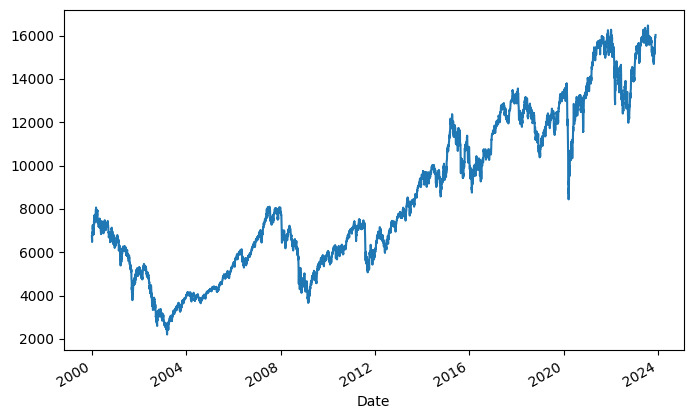

In [16]:
DAX['Close'].plot(figsize=(8, 5))

In [17]:
DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

In [18]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-11-20,15915.240234,15929.929688,15854.820312,15901.330078,15901.330078,93605500,-0.001121
2023-11-21,15911.019531,15948.070312,15891.309570,15900.530273,15900.530273,70926900,-0.000050
2023-11-22,15965.129883,15998.410156,15931.740234,15957.820312,15957.820312,58757800,0.003597
2023-11-23,15976.620117,16005.450195,15958.059570,15994.730469,15994.730469,38717400,0.002310
2023-11-24,15988.190430,16041.169922,15972.669922,16029.490234,16029.490234,46227600,0.002171


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

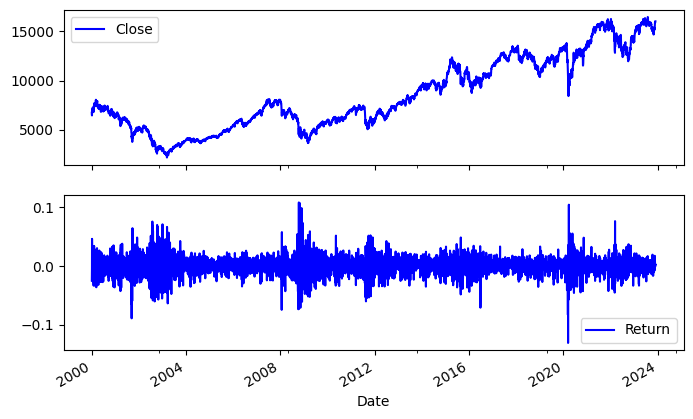

In [19]:
DAX[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

In [20]:
DAX['42d'] = DAX['Close'].rolling(42).mean()
DAX['252d'] = DAX['Close'].rolling(252).mean()

<Axes: xlabel='Date'>

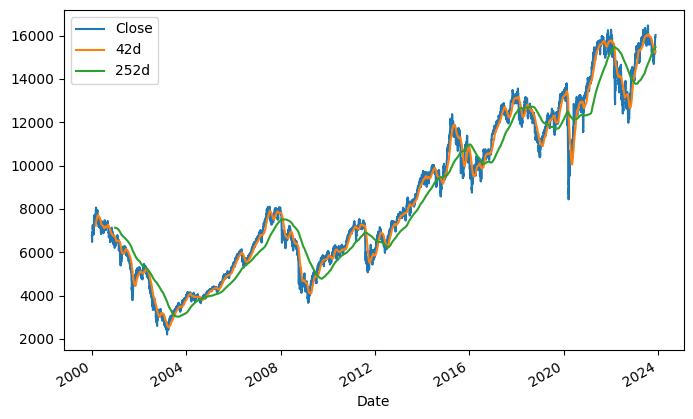

In [21]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5))

In [22]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std() * math.sqrt(252)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

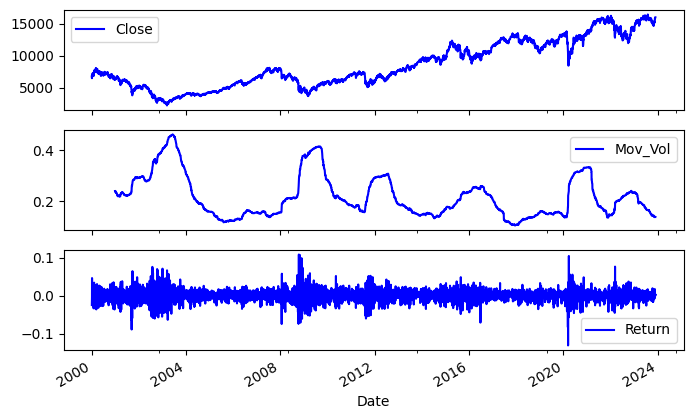

In [23]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,5))

In [24]:
import requests

In [25]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

es = requests.get(es_url)
vs = requests.get(vs_url)


In [26]:
with open('./data/es.txt', 'wb') as outfile:
    outfile.write(es.content)

In [27]:
with open('./data/vs.txt', 'wb') as outfile:
    outfile.write(vs.content)

In [28]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [29]:
new_file = open('./data/es50.txt', 'w')
new_file.writelines('date' + lines[3][:-1]
                     + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [30]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [31]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)

In [32]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [33]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


In [34]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)

In [35]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6I7    4357 non-null   float64
 8   V6I8    4343 non-null   float64
dtypes: float64(9)
memory usage: 340.4 KB


In [36]:
# regression analysis
data = pd.DataFrame({'EUROSTOXX':
                     es['SX5E'][(es.index > dt.datetime(1999, 1, 1)) & (es.index <= dt.datetime(2014, 9, 26))]})
data = data.join(pd.DataFrame({'VSTOXX':
                                vs['V2TX'][(vs.index > dt.datetime(1999, 1, 1)) & (vs.index <= dt.datetime(2014, 9, 26))]}))

In [37]:
# forward fill missing values
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4034 non-null   float64
 1   VSTOXX     4034 non-null   float64
dtypes: float64(2)
memory usage: 223.6 KB


C:\Users\pokem\AppData\Local\Temp\ipykernel_7944\3987232662.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [38]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2014-09-22,3257.48,15.8303
2014-09-23,3205.93,17.7684
2014-09-24,3244.01,15.9504
2014-09-25,3202.31,17.5658
2014-09-26,3219.58,17.6012


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

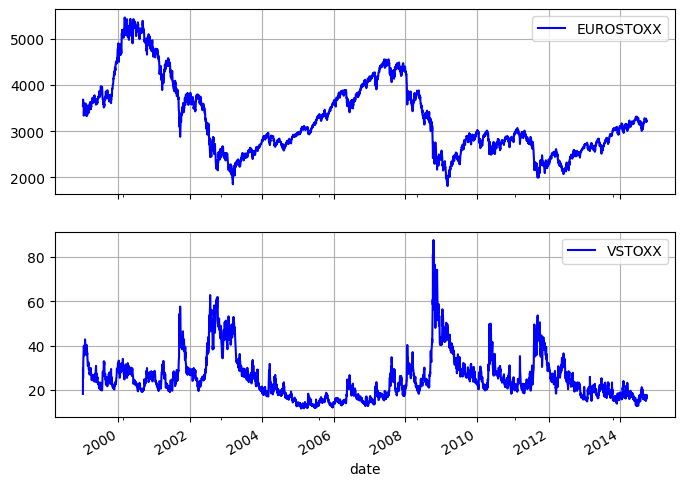

In [39]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [40]:
# log returns
rets = np.log(data / data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
date,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

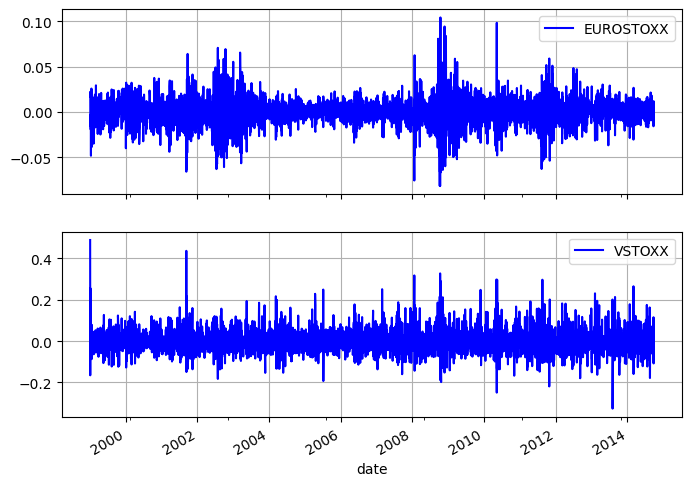

In [41]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [42]:
import statsmodels.formula.api as sm

In [43]:
# EUROSTOXX is independent variable, VSTOXX is the response

model = sm.ols(formula="VSTOXX ~ EUROSTOXX", data=rets).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 VSTOXX   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     4586.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:09:37   Log-Likelihood:                 7369.8
No. Observations:                4033   AIC:                        -1.474e+04
Df Residuals:                    4031   BIC:                        -1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.37e-05      0.001     -0.120      0.9

In [44]:
model.params
# there is a negative correlation

Intercept   -0.000074
EUROSTOXX   -2.752894
dtype: float64

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'VSTOXX returns')

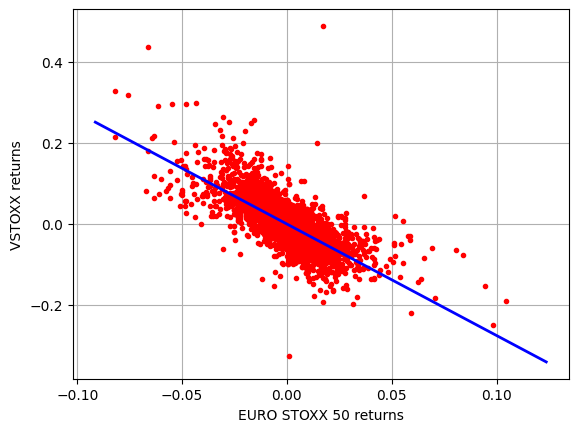

In [46]:
plt.plot(rets['EUROSTOXX'], rets['VSTOXX'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params['Intercept'] + model.params['EUROSTOXX'] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [47]:
# calculate correlation between the two directly
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.729538
VSTOXX,-0.729538,1.000000


<Axes: xlabel='date'>

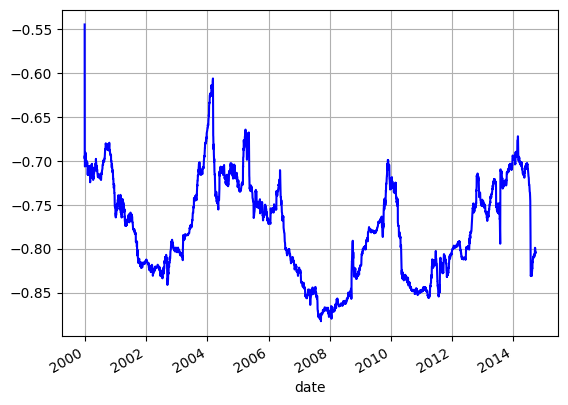

In [48]:
# correlation on a yearly basis, 252 trading days
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')

In [49]:
symbols = ['^GDAXI', '^GSPC', 'MSFT']
data = pd.DataFrame()

for sym in symbols:
    data[sym] = pdr.get_data_yahoo(sym, start='2006-01-01', end='2014-09-27')['Adj Close']
    data = data.dropna()
data.info()
data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2164 entries, 2006-01-03 to 2014-09-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GDAXI  2164 non-null   float64
 1   ^GSPC   2164 non-null   float64
 2   MSFT    2164 non-null   float64
dtypes: float64(3)
memory usage: 67.6 KB


,^GDAXI,^GSPC,MSFT
Date,,,
2006-01-03,5460.680176,1268.800049,18.994093
2006-01-04,5523.620117,1273.459961,19.086103
2006-01-05,5516.529785,1273.479980,19.100246
2006-01-06,5536.319824,1285.449951,19.043636
2006-01-09,5537.109863,1290.150024,19.008253


<Axes: xlabel='Date'>

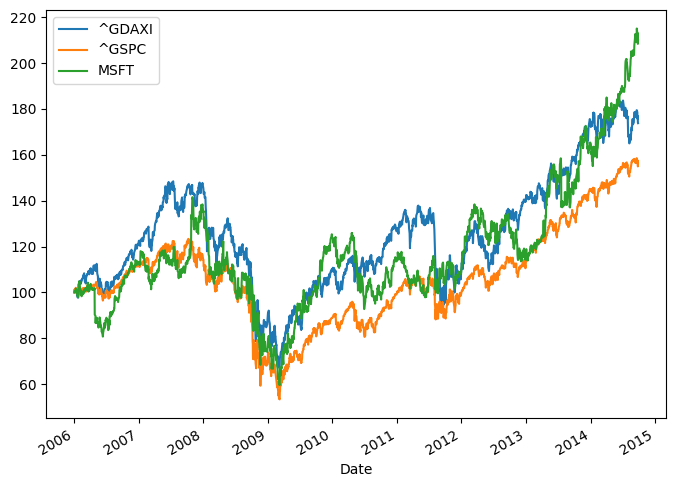

In [50]:
(data / data.iloc[0] * 100).plot(figsize=(8,6))

In [51]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,^GDAXI,^GSPC,MSFT
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,0.011460,0.003666,0.004832
2006-01-05,-0.001284,0.000016,0.000741
2006-01-06,0.003581,0.009356,-0.002968
2006-01-09,0.000143,0.003650,-0.001860


array([[<Axes: title={'center': '^GDAXI'}>,
        <Axes: title={'center': '^GSPC'}>],
       [<Axes: title={'center': 'MSFT'}>, <Axes: >]], dtype=object)

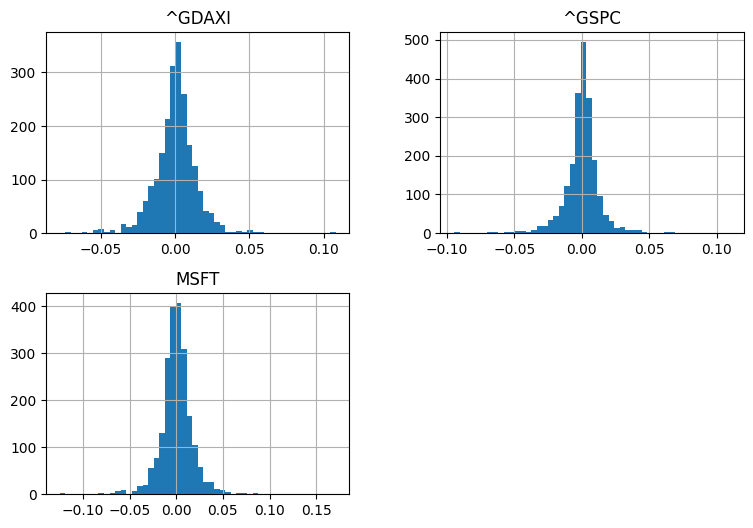

In [52]:
log_returns.hist(bins=50, figsize=(9, 6))

In [53]:
# portfolio optimization
symbols = ['AAPL', 'MSFT', 'DB', 'GLD']
noa = len(symbols)

data = pd.DataFrame()

for sym in symbols:
    data[sym] = pdr.get_data_yahoo(sym, start='2010-01-01', end='2014-09-13')['Adj Close']

data.columns = symbols

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

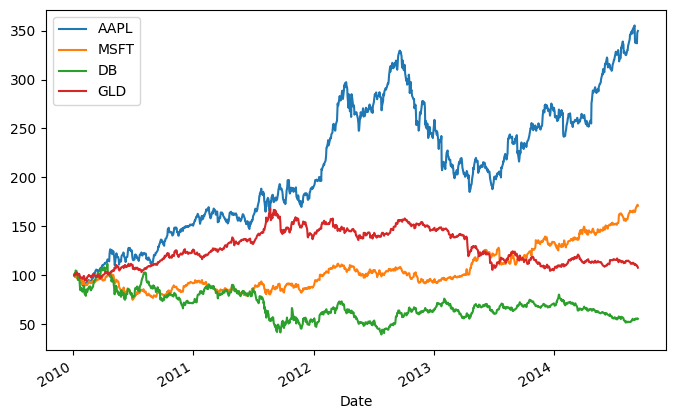

In [54]:
(data / data.iloc[0] * 100).plot(figsize=(8, 5))

In [55]:
rets = np.log(data / data.shift(1))

In [56]:
rets.mean() * 252

AAPL    0.267080
MSFT    0.114506
DB     -0.125174
GLD     0.016054
dtype: float64

In [57]:
rets.cov() * 252

,AAPL,MSFT,DB,GLD
AAPL,0.072784,0.020459,0.041027,0.005231
MSFT,0.020459,0.049402,0.046089,0.002105
DB,0.041027,0.046089,0.177517,0.008777
GLD,0.005231,0.002105,0.008777,0.032406


In [58]:
# only long positions assumed
weights = np.random.random(noa)
weights /= np.sum(weights)

In [59]:
np.sum(rets.mean() * weights) * 252
# expected portfolio return

0.035198856902043316

In [60]:
np.dot(weights.T, np.dot(rets.cov()*252, weights))
# expected portfolio variance

0.03451926695111302

In [61]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))
# expected portfolio volatility

0.18579361385987683

In [62]:
prets = []
pvols = []

for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

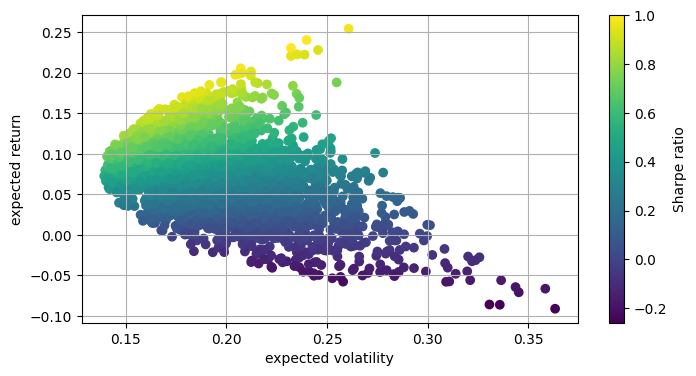

In [63]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

# assume rf = 0 

In [64]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [65]:
import scipy.optimize as sco

In [66]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [67]:
cons = ({'type':'eq', 'fun': lambda x: np.sum(x) - 1})

In [68]:
bnds = tuple((0, 1) for x in range(noa))

In [69]:
noa * [1. / noa]

[0.25, 0.25, 0.25, 0.25]

In [70]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa], method='SLSQP', bounds=bnds, constraints=cons)

CPU times: total: 15.6 ms
Wall time: 27.6 ms


In [71]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0078034630756376
       x: [ 7.916e-01  2.084e-01  7.112e-16  0.000e+00]
     nit: 5
     jac: [ 1.787e-04 -6.790e-04  1.314e+00  1.592e-02]
    nfev: 25
    njev: 5

In [72]:
opts['x'].round(3)

array([0.792, 0.208, 0.   , 0.   ])

In [73]:
statistics(opts['x'].round(3))

array([0.23534458, 0.23352239, 1.00780308])

In [74]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [75]:
optv = sco.minimize(min_func_variance, noa * [1. / noa], method='SLSQP', bounds=bnds, constraints=cons)

In [76]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.01927724845513599
       x: [ 1.406e-01  3.043e-01  0.000e+00  5.551e-01]
     nit: 6
     jac: [ 3.872e-02  3.816e-02  4.933e-02  3.873e-02]
    nfev: 30
    njev: 6

In [77]:
optv['x'].round(3)

array([0.141, 0.304, 0.   , 0.555])

In [78]:
statistics(optv['x'].round(3))

array([0.08137818, 0.13884325, 0.58611549])

In [79]:
def min_func_port(weights):
    return statistics(weights)[1]

In [80]:
bnds = tuple((0, 1) for x in weights)

In [81]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []

for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, 
        {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: total: 1.88 s
Wall time: 2.04 s


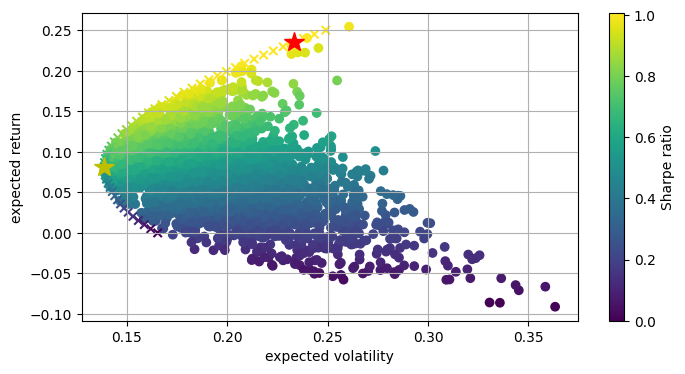

In [82]:
## efficient frontier

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c = prets / pvols, marker='o')
plt.scatter(tvols, trets, c = trets / tvols, marker='x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0)

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')

In [83]:
# Capital Market Line
import scipy.interpolate as sci

In [84]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [85]:
tck = sci.splrep(evols, erets)

In [86]:
def f(x):
    return sci.splev(x, tck, der=0)

def df(x):
    return sci.splev(x, tck, der=1)

In [87]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [88]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [89]:
opt

array([0.01      , 0.96532151, 0.23766278])

In [90]:
np.round(equations(opt), 6)

array([0., 0., 0.])

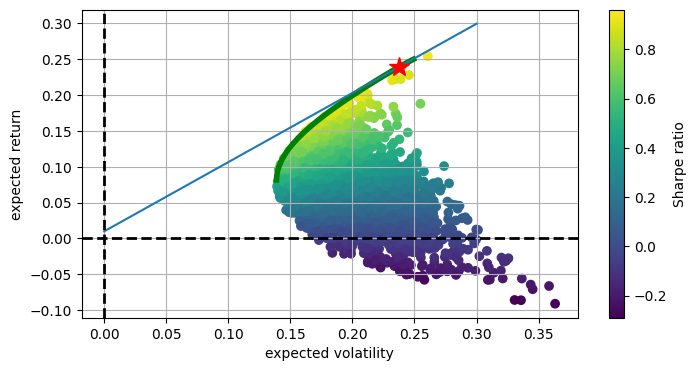

In [91]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=(prets-0.01) / pvols, marker='o')
plt.plot(evols, erets, 'g', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.colorbar(label="Sharpe ratio")

In [92]:
cons = ({'type':'eq', 'fun':lambda x: statistics(x)[0] - f(opt[2])},
        {'type':'eq', 'fun':lambda x: np.sum(x) - 1})

res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

In [93]:
res['x'].round(3)

array([0.819, 0.181, 0.   , 0.   ])

In [94]:
# principal component analysis
from sklearn.decomposition import KernelPCA

In [95]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
                   'BMW.DE', 'CBK.DE', 'CON.DE', 'DB1.DE',
                   'DBK.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
                   'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
                   'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
                   'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
                   '^GDAXI']

In [96]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = pdr.get_data_yahoo(sym, start='2010-01-01', end='2014-09-27')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [97]:
data = data.dropna()

In [98]:
dax = pd.DataFrame(data.pop("^GDAXI"))

In [99]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2010-01-04,38.505001,88.540001,44.849998,55.502960,46.445000,32.049999
2010-01-05,39.720001,88.809998,44.169998,54.489342,46.200001,32.310001
2010-01-06,39.400002,89.500000,44.450001,54.144909,46.165001,32.810001
2010-01-07,39.744999,88.470001,44.154999,53.436359,45.700001,33.099998
2010-01-08,39.599998,87.989998,44.020000,52.963997,44.380001,32.654999


In [100]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [101]:
pca = KernelPCA().fit(data.apply(scale_function))

In [102]:
len(pca.eigenvalues_)

28

In [103]:
pca.eigenvalues_[:10].round()

array([21291.,  6520.,  2403.,  1285.,   523.,   401.,   329.,   193.,
         133.,   121.])

In [104]:
get_we = lambda x: x / x.sum()

In [105]:
get_we(pca.eigenvalues_)[:10]

array([0.631041  , 0.19325299, 0.07121548, 0.03807875, 0.01551487,
       0.01189864, 0.0097541 , 0.0057334 , 0.0039398 , 0.00357195])

In [106]:
get_we(pca.eigenvalues_)[:5].sum()

0.9491030956502844

In [107]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

<Axes: xlabel='Date'>

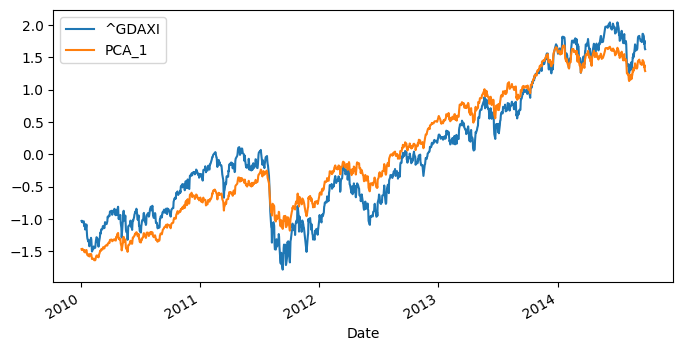

In [108]:
dax.apply(scale_function).plot(figsize=(8, 4))

In [109]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.eigenvalues_)
dax['PCA_5'] = np.dot(pca_components, weights)

<Axes: xlabel='Date'>

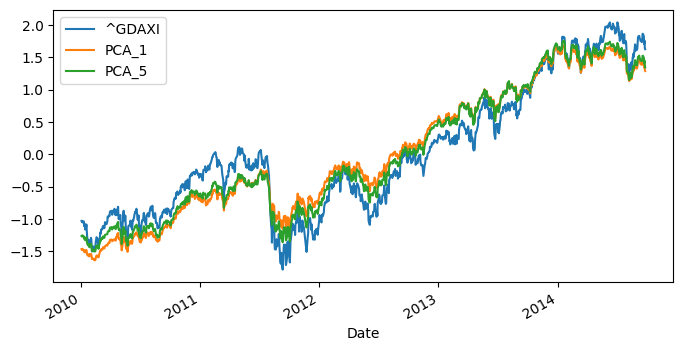

In [110]:
dax.apply(scale_function).plot(figsize=(8,4))

In [111]:
import matplotlib as mpl

In [112]:
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates

array([14613., 14614., 14615., ..., 16337., 16338., 16339.])

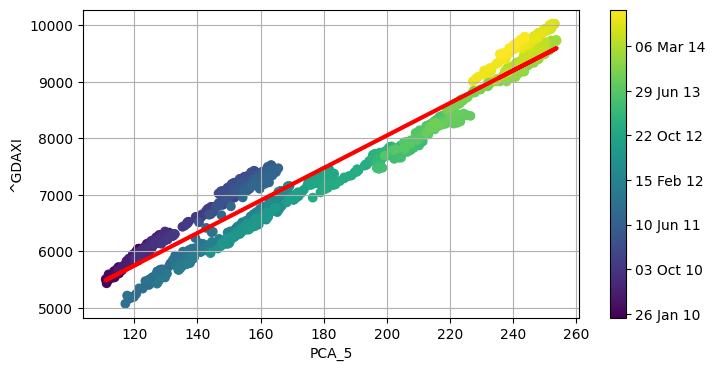

In [113]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))

In [114]:
cut_date = '2011-07-01'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                                  dax['^GDAXI'][dax.index < cut_date], 1),
                                  early_pca)

In [115]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                                  dax['^GDAXI'][dax.index >= cut_date], 1),
                                  late_pca)

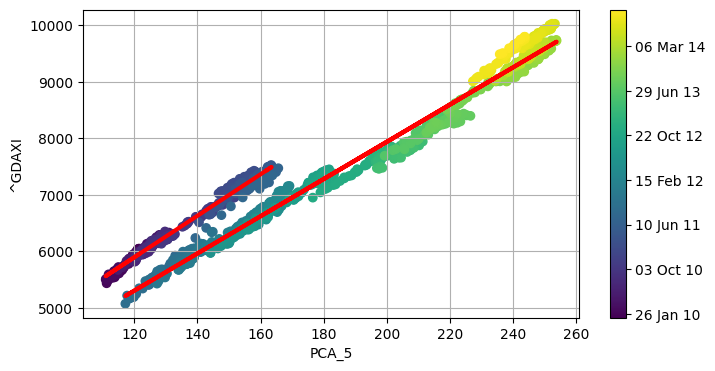

In [116]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))

In [117]:
# usually will use relative return data in the real world

In [118]:
# OOP & GUI

In [119]:
def discount_factor(r, t):
    df = np.exp(-r * t)
    return df

In [120]:
class ShortRate:
    def __init__(self, name, rate):
        self.name = name
        self.rate = rate

    def get_discount_factors(self, time_list):
        time_list = np.array(time_list)
        return np.exp(-self.rate * time_list)

In [121]:
sr = ShortRate('r', 0.05)

In [122]:
sr.name, sr.rate

('r', 0.05)

In [123]:
time_list = [0.0, 0.5, 1.0, 1.25, 1.75, 2.0] # time in years

In [124]:
sr.get_discount_factors(time_list)

array([1.        , 0.97530991, 0.95122942, 0.93941306, 0.91621887,
       0.90483742])

In [125]:
# cash flow example
sr.rate = 0.05
cash_flows = np.array([-100, 50, 75])
time_list = [0.0, 1.0, 2.0]

In [126]:
disc_facts = sr.get_discount_factors(time_list)

In [127]:
disc_facts

array([1.        , 0.95122942, 0.90483742])

In [128]:
disc_facts * cash_flows

array([-100.        ,   47.56147123,   67.86280635])

In [129]:
# NPV
np.sum(disc_facts * cash_flows)

15.424277577732667

In [130]:
sr.rate = 0.15
np.sum(sr.get_discount_factors(time_list) * cash_flows)

-1.403234627618268

In [131]:
class CashFlowSeries:
    def __init__(self, name, time_list, cash_flows, ShortRate):
        self.name = name
        self.time_list = time_list
        self.cash_flows = cash_flows
        self.short_rate = ShortRate

    def present_value_list(self):
        df = self.short_rate.get_discount_factors(self.time_list)
        return np.array(self.cash_flows) * df
    
    def net_present_value(self):
        return np.sum(self.present_value_list())

In [132]:
sr.rate = 0.05
cfs = CashFlowSeries('cfs', time_list, cash_flows, sr)

In [133]:
cfs.cash_flows

array([-100,   50,   75])

In [134]:
cfs.time_list

[0.0, 1.0, 2.0]

In [135]:
cfs.present_value_list()

array([-100.        ,   47.56147123,   67.86280635])

In [136]:
cfs.net_present_value()

15.424277577732667

In [137]:
class CFSSensitivity(CashFlowSeries):
    def npv_sensitivity(self, short_rates):
        npvs = []
        for rate in short_rates:
            sr.rate = rate
            npvs.append(self.net_present_value())
        return np.array(npvs)

In [138]:
cfs_sens = CFSSensitivity('cfs', time_list, cash_flows, sr)

In [139]:
short_rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2]

In [140]:
npvs = cfs_sens.npv_sensitivity(short_rates)
npvs

array([23.01739219, 20.10770244, 15.42427758, 10.94027255,  6.64667738,
        2.53490386, -1.40323463, -8.78945889])

Text(0, 0.5, 'net present value')

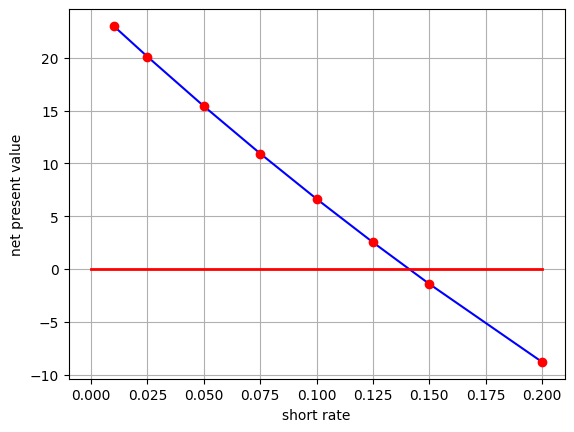

In [141]:
plt.plot(short_rates, npvs, 'b')
plt.plot(short_rates, npvs, 'ro')
plt.plot((0, max(short_rates)), (0, 0), 'r', lw=2)
plt.grid(True)
plt.xlabel('short rate')
plt.ylabel('net present value')